# 机器学习——05线性回归

## 参考资料

1. [AIlearning](https://ailearning.apachecn.org/#/docs/ml/2)
2. [Machine-Learning-in-Action](https://github.com/TeFuirnever/Machine-Learning-in-Action)
3. 庞善民.西安交通大学机器学习导论2022春PPT

使用Jupyter进行练习，python3

## 一、回归场景

前边提到的分类的目标变量是标称型数据，而回归则是对连续型的数据做出处理，回归的**目的是预测数值型数据的目标值**。

回归的目的是预测数值型的目标值。最直接的办法是依据输入写出一个目标值的计算公式。

假如你想要预测兰博基尼跑车的功率大小，可能会这样计算:

HorsePower = 0.0015 * annualSalary - 0.99 * hoursListeningToPublicRadio

这就是所谓的 `回归方程(regression equation)`，其中的 0.0015 和 -0.99 称作 `回归系数（regression weights）`，求这些回归系数的过程就是回归。一旦有了这些回归系数，再给定输入，做预测就非常容易了。具体的做法是用回归系数乘以输入值，再将结果全部加在一起，就得到了预测值。我们这里所说的，回归系数是一个向量，输入也是向量，这些运算也就是求出二者的内积。

说到回归，一般都是指 `线性回归(linear regression)`。线性回归意味着可以将输入项分别乘以一些常量，再将结果加起来得到输出。

补充:
线性回归假设特征和结果满足线性关系。其实线性关系的表达能力非常强大，每个特征对结果的影响强弱可以由前面的参数体现，而且每个特征变量可以首先映射到一个函数，然后再参与线性计算。这样就可以表达特征与结果之间的非线性关系。

## 二、回归原理

![image-20220316224043829](https://note-image-1307786938.cos.ap-beijing.myqcloud.com/typora/qshell/image-20220316224043829.png)

### 1、线性回归

我们应该怎样从一大堆数据里求出回归方程呢？ 假定输入数据存放在矩阵 $X$ 中，而回归系数存放在向量 $ w$中。那么对于给定的数据 $x_1$，预测结果将会通过 $y = x_1^T w$ 给出。现在的问题是，手里有一些 $x$ 和对应的 $y$，怎样才能找到 $w$ 呢？一个常用的方法就是找出使误差最小的 $w$ 。这里的误差是指预测 $y$ 值和真实 $y$ 值之间的差值，使用该误差的简单累加将使得正差值和负差值相互抵消，所以我们采用平方误差（实际上就是我们通常所说的最小二乘法）。

(假设一共有m个样本)，平方误差可以写做（其实我们是使用这个函数作为 loss function）:

$$
\sum_1^{m}(y_i-x_i^Tw)^2
$$

用矩阵写作$\frac{1}{2}(y-\pmb X w)^T(y-\pmb X w)$，使用正规方程可以得到$w$的结果如下：
$$
\hat w =( {\pmb X}^T\pmb X)^{-1}{\pmb X}^Ty
$$

具体的解法可参考本人的另一篇博客：[[机器学习导论]——第二课——线性回归与逻辑回归](https://blog.csdn.net/weixin_47692652/article/details/123579737)

需要对矩阵求逆，因此这个方程只在逆矩阵存在的时候适用，我们在程序代码中对此作出判断。 判断矩阵是否可逆的一个可选方案是:

判断矩阵的行列式是否为 0，若为 0 ，矩阵就不存在逆矩阵，不为 0 的话，矩阵才存在逆矩阵。


#### 线性回归工作原理

1、读入数据，将数据特征$\pmb X$、特征标签$y$存储在矩阵中

2、验证 $\pmb X^T\pmb X$ 矩阵是否可逆

3、使用最小二乘法求得 回归系数 $w$ 的最佳估计

#### 线性回归开发流程

1、收集数据: 采用任意方法收集数据

2、准备数据: 回归需要数值型数据，标称型数据将被转换成二值型数据

3、分析数据: 绘出数据的可视化二维图将有助于对数据做出理解和分析，在采用缩减法求得新回归系数之后，可以将新拟合线绘在图上作为对比

4、训练算法: 找到回归系数

5、测试算法: 使用 R^2 或者预测值和数据的拟合度，来分析模型的效果

6、使用算法: 使用回归，可以在给定输入的时候预测出一个数值，这是对分类方法的提升，因为这样可以预测连续型数据而不仅仅是离散的类别标签


#### 线性回归算法特点

+ 优点: 结果易于理解，计算上不复杂。

+ 缺点: 对非线性的数据拟合不好。

+ 适用于数据类型: 数值型和标称型数据。

#### 线性回归项目案例

##### 项目概述

根据下图中的点，找出该数据的最佳拟合直线。

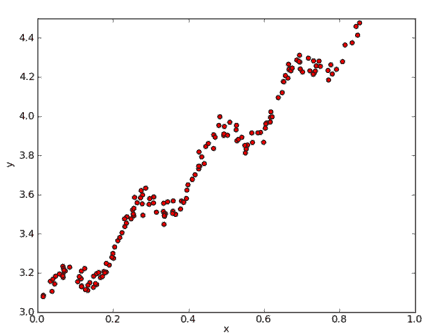

数据格式为：
```
x0          x1          y 
1.000000    0.067732    3.176513
1.000000    0.427810    3.816464
1.000000    0.995731    4.550095
1.000000    0.738336    4.256571
```

##### 代码编写


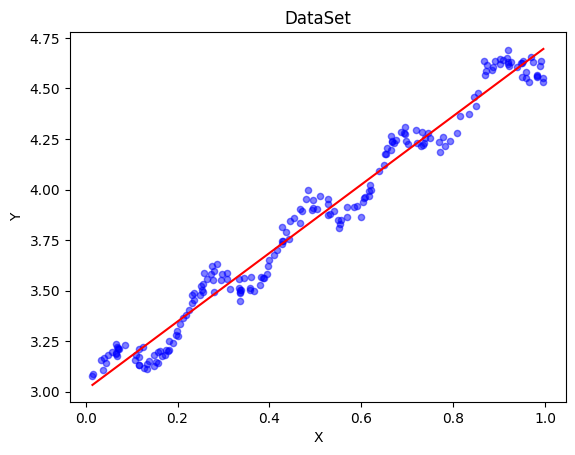

In [1]:
from numpy import *
import matplotlib.pyplot as plt

def loadData(fileName):
    """加载数据:解析以tab键分隔的文件中的浮点数

    Args:
        fileName : 数据集文件

    Returns:
        dataMat :   feature 对应的数据集
        labelMat :  feature 对应的分类标签，即类别标签
    """
    # 获取样本特征的总数，不算最后的目标变量 
    numFeat = len(open(fileName).readline().split('\t')) - 1 
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        # 读取每一行
        lineArr =[]
        # 删除一行中以tab分隔的数据前后的空白符号
        curLine = line.strip().split('\t')
        # i 从0到2，不包括2 
        for i in range(numFeat):
            # 将数据添加到lineArr List中，每一行数据测试数据组成一个行向量           
            lineArr.append(float(curLine[i]))
            # 将测试数据的输入数据部分存储到dataMat 的List中
        dataMat.append(lineArr)
        # 将每一行的最后一个数据，即类别，或者叫目标变量存储到labelMat List中
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat   


def regression(xArr,yArr):
    '''线性回归
    Args:
        xArr : 输入的样本数据，包含每个样本数据的 feature
        yArr : 对应于输入数据的类别标签，也就是每个样本对应的目标变量
    Returns:
        ws: 回归系数
    '''

    # mat()函数将xArr，yArr转换为矩阵 mat().T 代表的是对矩阵进行转置操作
    xMat = mat(xArr)
    yMat = mat(yArr).T
    # 矩阵乘法的条件是左矩阵的列数等于右矩阵的行数
    xTx = xMat.T*xMat
    # linalg.det() 函数是用来求得矩阵的行列式的，如果矩阵的行列式为0，则这个矩阵是不可逆的，就无法进行接下来的运算                   
    if linalg.det(xTx) == 0.0:
        print("无法求得矩阵的逆")
        return
    ws = xTx.I * (xMat.T*yMat)            
    return ws


def show():
    xArr, yArr = loadData('data/data.txt')   #加载数据集
    ws = regression(xArr, yArr)          #计算回归系数
    xMat = mat(xArr)                   #创建xMat矩阵
    yMat = mat(yArr)                   #创建yMat矩阵
    xCopy = xMat.copy()                   #深拷贝xMat矩阵
    xCopy.sort(0)                         #排序
    yHat = xCopy * ws                     #计算对应的y值
    fig = plt.figure()
    ax = fig.add_subplot(111)             #添加subplot
    ax.plot(xCopy[:, 1], yHat, c = 'red') #绘制回归曲线
    # 降维后还是个矩阵，矩阵.A（等效于矩阵.getA()）变成了数组
    ax.scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue',alpha = .5) #绘制样本点
    plt.title('DataSet')                  #绘制title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

show()

### 2、局部加权线性平均

线性回归的一个问题是有可能出现欠拟合现象，因为它求的是具有最小均方差的无偏估计。显而易见，如果模型欠拟合将不能取得最好的预测效果。所以有些方法允许在估计中引入一些偏差，从而降低预测的均方误差。

一个方法是局部加权线性回归（Locally Weighted Linear Regression，LWLR）。在这个算法中，我们给预测点附近的每个点赋予一定的权重，然后与线性回归类似，在这个子集上基于最小均方误差来进行普通的回归。我们需要最小化的目标函数大致为:
$$
\sum_i w(y^{(i)}-\hat y^{(i)})^2
$$
目标函数中 $w$ 为权重，不是回归系数。与 kNN 一样，这种算法每次预测均需要事先选取出对应的数据子集。该算法解出回归系数 $w$ 的形式如下:
$$
( {\pmb X}^T\pmb W\pmb X)^{-1}{\pmb X}^T\pmb Wy
$$
其中 $\pmb W$ 是一个矩阵，用来给每个数据点赋予权重。$\hat{w}$ 则为回归系数。 这两个是不同的概念，请勿混用

LWLR 使用 “核”（与支持向量机中的核类似）来对附近的点赋予更高的权重。核的类型可以自由选择，最常用的核就是高斯核，高斯核对应的权重如下:

$$
w(i) = exp(\frac{(x^{{(i)}}-x)^2}{-2k^2})
$$

这样就构建了一个只含对角元素的权重矩阵 $w$，并且点 $x$ 与 $x(i)$ 越近，$w(i)$ 将会越大。上述公式中包含一个需要用户指定的参数 $k$ ，它决定了对附近的点赋予多大的权重，这也是使用 LWLR 时唯一需要考虑的参数，下面的图给出了参数  $k$ 与权重的关系。

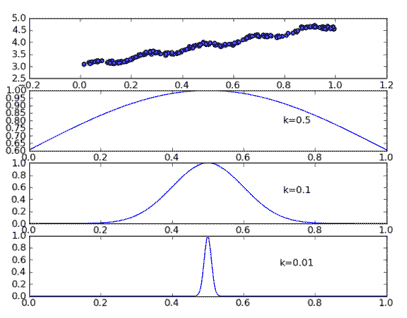

上面的图是 每个点的权重图（假定我们正预测的点是 x = 0.5），最上面的图是原始数据集，第二个图显示了当 k = 0.5 时，大部分的数据都用于训练回归模型；而最下面的图显示当 k=0.01 时，仅有很少的局部点被用于训练回归模型。


#### 局部加权线性回归工作原理

1、读入数据，将数据特征x、特征标签y存储在矩阵x、y中

2、利用高斯核构造一个权重矩阵 W，对预测点附近的点施加权重

3、验证 X^TWX 矩阵是否可逆

4、使用最小二乘法求得 回归系数 w 的最佳估计

#### 项目案例

##### 项目概述

我们仍然使用上面线性回归的数据集，对这些点进行一个局部加权线性回归的拟合。

数据格式为:

```
1.000000    0.067732    3.176513
1.000000    0.427810    3.816464
1.000000    0.995731    4.550095
1.000000    0.738336    4.256571
```

##### 代码编写

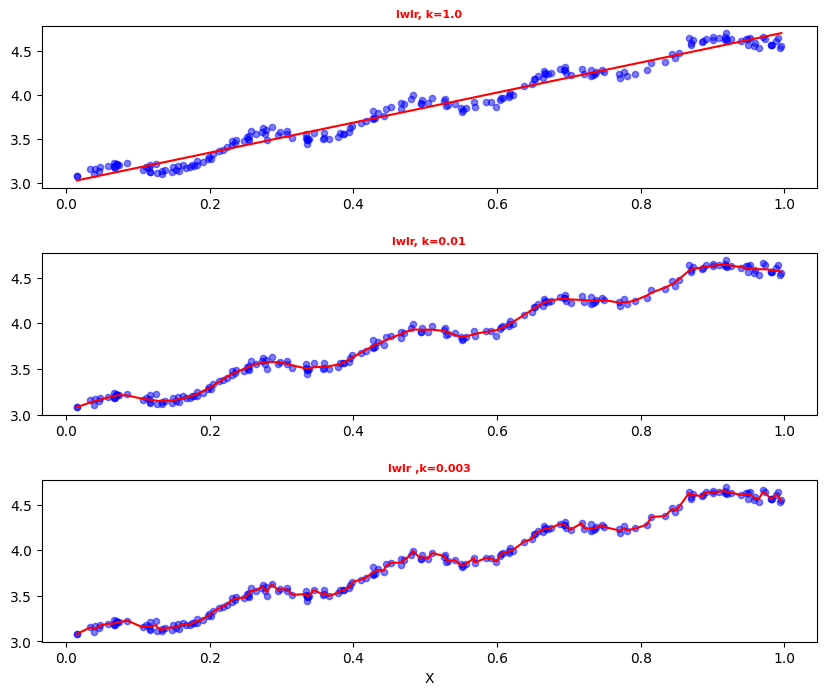

In [2]:
from numpy import *
import matplotlib.pyplot as plt


def loadData(fileName):
    """加载数据:解析以tab键分隔的文件中的浮点数

    Args:
        fileName : 数据集文件

    Returns:
        dataMat :   feature 对应的数据集
        labelMat :  feature 对应的分类标签，即类别标签
    """
    # 获取样本特征的总数，不算最后的目标变量
    numFeat = len(open(fileName).readline().split('\t')) - 1
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        # 读取每一行
        lineArr = []
        # 删除一行中以tab分隔的数据前后的空白符号
        curLine = line.strip().split('\t')
        # i 从0到2，不包括2
        for i in range(numFeat):
            # 将数据添加到lineArr List中，每一行数据测试数据组成一个行向量
            lineArr.append(float(curLine[i]))
            # 将测试数据的输入数据部分存储到dataMat 的List中
        dataMat.append(lineArr)
        # 将每一行的最后一个数据，即类别，或者叫目标变量存储到labelMat List中
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat


def lwlr(testP, X, y, k=1.0):
    """局部加权线性回归，在待预测点附近的每个点赋予一定的权重，
    在子集上基于最小均方差来进行普通的回归。

    Args:
        testP (行向量): 测试样本点
        X: 样本的特征数据
        y: 每个样本对应的类别标签，即目标变量
        k: 控制核函数的衰减速率. Defaults to 1.0.
    Returns:
        testP * ws: 数据点与具有权重的系数相乘得到的预测点
    Notes:
        这其中会用到计算权重的公式，w = e^((x^((i))-x) / -2k^2)
        理解: x为某个预测点，x^((i))为样本点，样本点距离预测点越近，贡献的误差越大（权值越大），越远则贡献的误差越小（权值越小）。
        关于预测点的选取，在我的代码中取的是样本点。其中k是带宽参数，控制w（钟形函数）的宽窄程度，类似于高斯函数的标准差。
        算法思路: 假设预测点取样本点中的第i个样本点（共m个样本点），遍历1到m个样本点（含第i个），算出每一个样本点与预测点的距离，
        也就可以计算出每个样本贡献误差的权值，可以看出w是一个有m个元素的向量（写成对角阵形式）。
    """
    # 转化为矩阵
    X_mat = mat(X)
    y_mat = mat(y).T
    # 数据行数
    m = shape(X_mat)[0]
    # eye()返回一个对角线元素为1，其他元素为0的二维数组，创建权重矩阵weights，
    # 该矩阵为每个样本点初始化了一个权重
    weights = mat(eye((m)))
    for i in range(m):
        # 计算 testPoint 与输入样本点之间的距离，然后下面计算出每个样本贡献误差的权值
        diffMat = testP - X_mat[i, :]
        # k控制衰减的速度
        weights[i, i] = exp(diffMat * diffMat.T / (-2.0 * k**2))
    xTx = X_mat.T * (weights * X_mat)
    if linalg.det(xTx) == 0.0:
        print("无法求得矩阵的逆")
        return
    ws = xTx.I * (X_mat.T * (weights * y_mat))  # 计算回归系数
    return testP * ws


def lwlrTest(testArr, xArr, yArr, k=1.0):
    '''测试局部加权线性回归，对数据集中每个点调用 lwlr() 函数
        Args: 
            testArr: 测试所用的所有样本点
            xArr: 样本的特征数据，即 feature
            yArr: 每个样本对应的类别标签，即目标变量
            k: 控制核函数的衰减速率
        Returns: 
            yHat: 预测点的估计值
    '''
    # 得到样本点的总数
    m = shape(testArr)[0]
    # 构建一个全部都是 0 的 1 * m 的矩阵
    yHat = zeros(m)
    # 循环所有的数据点，并将lwlr运用于所有的数据点
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    # 返回估计值
    return yHat


# 绘制多条局部加权回归曲线
def plotlwlrRegression():
    xArr, yArr = loadData('data/data.txt')  # 加载数据集
    yHat_1 = lwlrTest(xArr, xArr, yArr, 1.0)  # 根据局部加权线性回归计算yHat
    yHat_2 = lwlrTest(xArr, xArr, yArr, 0.01)  # 根据局部加权线性回归计算yHat
    yHat_3 = lwlrTest(xArr, xArr, yArr, 0.003)  # 根据局部加权线性回归计算yHat
    xMat = mat(xArr)  # 创建xMat矩阵
    yMat = mat(yArr)  # 创建yMat矩阵
    srtInd = xMat[:, 1].argsort(0)  # 排序，返回索引值
    xSort = xMat[srtInd][:, 0, :]
    fig, axs = plt.subplots(nrows=3,
                            ncols=1,
                            sharex=False,
                            sharey=False,
                            figsize=(10, 8))
    plt.subplots_adjust(left=None,
                        bottom=None,
                        right=None,
                        top=None,
                        hspace=0.4)
    axs[0].plot(xSort[:, 1], yHat_1[srtInd], c='red')  # 绘制回归曲线
    axs[1].plot(xSort[:, 1], yHat_2[srtInd], c='red')  # 绘制回归曲线
    axs[2].plot(xSort[:, 1], yHat_3[srtInd], c='red')  # 绘制回归曲线
    axs[0].scatter(xMat[:, 1].flatten().A[0],
                   yMat.flatten().A[0],
                   s=20,
                   c='blue',
                   alpha=.5)  # 绘制样本点
    axs[1].scatter(xMat[:, 1].flatten().A[0],
                   yMat.flatten().A[0],
                   s=20,
                   c='blue',
                   alpha=.5)  # 绘制样本点
    axs[2].scatter(xMat[:, 1].flatten().A[0],
                   yMat.flatten().A[0],
                   s=20,
                   c='blue',
                   alpha=.5)  # 绘制样本点
    # 设置标题,x轴label,y轴label
    axs0_title_text = axs[0].set_title('lwlr, k=1.0')
    axs1_title_text = axs[1].set_title('lwlr, k=0.01')
    axs2_title_text = axs[2].set_title('lwlr ,k=0.003')
    plt.setp(axs0_title_text, size=8, weight='bold', color='red')
    plt.setp(axs1_title_text, size=8, weight='bold', color='red')
    plt.setp(axs2_title_text, size=8, weight='bold', color='red')
    plt.xlabel('X')
    plt.show()


plotlwlrRegression()

上图使用了 3 种不同平滑值绘出的局部加权线性回归的结果。上图中的平滑系数 k =1.0，中图 k = 0.01，下图 k = 0.003 。可以看到，k = 1.0 时的使所有数据等比重，其模型效果与基本的线性回归相同，k=0.01时该模型可以挖出数据的潜在规律，而 k=0.003时则考虑了太多的噪声，进而导致了过拟合现象。

局部加权线性回归也存在一个问题，即增加了计算量，因为它对每个点做预测时都必须使用整个数据集。

## 三、项目案例

### 项目概述

我们有一份来自 UCI 的数据集合的数据，记录了鲍鱼（一种介壳类水生动物）的年龄。鲍鱼年龄可以从鲍鱼壳的层数推算得到。

### 开发流程

收集数据: 采用任意方法收集数据

准备数据: 回归需要数值型数据，标称型数据将被转换成二值型数据

分析数据: 绘出数据的可视化二维图将有助于对数据做出理解和分析，在采用缩减法求得新回归系数之后，可以将新拟合线绘在图上作为对比

训练算法: 找到回归系数

测试算法: 使用 rssError()函数 计算预测误差的大小，来分析模型的效果

使用算法: 使用回归，可以在给定输入的时候预测出一个数值，这是对分类方法的提升，因为这样可以预测连续型数据而不仅仅是离散的类别标签

### 收集数据
数据已收集

### 准备数据
回归需要数值型数据，标称型数据将被转换成二值型数据

数据存储格式:

```
1    0.455    0.365    0.095    0.514    0.2245    0.101    0.15    15
1    0.35    0.265    0.09    0.2255    0.0995    0.0485    0.07    7
-1    0.53    0.42    0.135    0.677    0.2565    0.1415    0.21    9
1    0.44    0.365    0.125    0.516    0.2155    0.114    0.155    10
0    0.33    0.255    0.08    0.205    0.0895    0.0395    0.055    7
```

### 分析数据

绘出数据的可视化二维图将有助于对数据做出理解和分析，在采用缩减法求得新回归系数之后，可以将新拟合线绘在图上作为对比

### 训练算法
使用上面我们讲到的局部加权线性回归训练算法，求出回归系数

### 测试算法
 使用`rssError()`函数 计算预测误差的大小，来分析模型的效果


In [6]:
def rssError(yArr, yHatArr):
    '''计算分析预测误差的大小
        Args:
            yArr: 真实的目标变量
            yHatArr: 预测得到的估计值
        Returns:
            计算真实值和估计值得到的值的平方和作为最后的返回值
    '''
    return ((yArr - yHatArr)**2).sum()

def abaloneTest():
    '''预测鲍鱼的年龄
    Args:
        None
    Returns:
        None
    '''
    abX, abY = loadData('data/abalone.txt')
    print('训练集与测试集相同:局部加权线性回归,核k的大小对预测的影响:')
    yHat01 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 0.1)
    yHat1 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 1)
    yHat10 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 10)
    print('k=0.1时,误差大小为:',rssError(abY[0:99], yHat01.T))
    print('k=1  时,误差大小为:',rssError(abY[0:99], yHat1.T))
    print('k=10 时,误差大小为:',rssError(abY[0:99], yHat10.T))
    print('')
    print('训练集与测试集不同:局部加权线性回归,核k的大小是越小越好吗？更换数据集,测试结果如下:')
    yHat01 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 0.1)
    yHat1 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 1)
    yHat10 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 10)
    print('k=0.1时,误差大小为:',rssError(abY[100:199], yHat01.T))
    print('k=1  时,误差大小为:',rssError(abY[100:199], yHat1.T))
    print('k=10 时,误差大小为:',rssError(abY[100:199], yHat10.T))
    print('')
    print('训练集与测试集不同:简单的线性归回与k=1时的局部加权线性回归对比:')
    print('k=1时,误差大小为:', rssError(abY[100:199], yHat1.T))
    ws = regression(abX[0:99], abY[0:99])
    yHat = mat(abX[100:199]) * ws
    print('简单的线性回归误差大小:', rssError(abY[100:199], yHat.T.A))

abaloneTest()

训练集与测试集相同:局部加权线性回归,核k的大小对预测的影响:
k=0.1时,误差大小为: 56.78420911837208
k=1  时,误差大小为: 429.89056187030394
k=10 时,误差大小为: 549.1181708826065

训练集与测试集不同:局部加权线性回归,核k的大小是越小越好吗？更换数据集,测试结果如下:
k=0.1时,误差大小为: 25119.459111157415
k=1  时,误差大小为: 573.5261441895706
k=10 时,误差大小为: 517.5711905381745

训练集与测试集不同:简单的线性归回与k=1时的局部加权线性回归对比:
k=1时,误差大小为: 573.5261441895706
简单的线性回归误差大小: 518.6363153249081


## 四、缩减系数来“理解”数据

如果数据的特征比样本点还多应该怎么办？是否还可以使用线性回归和之前的方法来做预测？答案是否定的，即我们不能再使用前面介绍的方法。这是因为在计算 $(\pmb X^T\pmb X)^{-1}$矩阵求逆 的时候会出错。

如果特征比样本点还多(n > m)，也就是说输入数据的矩阵 $X$ 不是满秩矩阵。非满秩矩阵求逆时会出现问题。

为了解决这个问题，我们引入了 `岭回归（ridge regression）` 这种缩减方法。接着是 `lasso`法，最后介绍 `前向逐步回归`。

相关原理也可以阅读本人的另一篇博客：[[机器学习导论]——第四课——特征选择](https://blog.csdn.net/weixin_47692652/article/details/123697006)

### 1、岭回归（L2正则化）

简单来说，岭回归就是在矩阵 $\pmb X^T\pmb X$ 上加一个 $λI$ 从而使得矩阵非奇异，进而能对$\pmb X^T\pmb X+λI$求逆。其中矩阵$I$是一个 n * n （等于列数） 的单位矩阵， 对角线上元素全为1，其他元素全为0。而λ是一个用户定义的数值，后面会做介绍。在这种情况下，回归系数的计算公式将变成:

$$
\hat w = (\pmb X^T\pmb X + λI)^{-1}\pmb X^Ty
$$

岭回归最先用来处理特征数多于样本数的情况，现在也用于在估计中加入偏差，从而得到更好的估计。这里通过引入 λ 来限制了所有 w 之和，通过引入该惩罚项，能够减少不重要的参数，这个技术在统计学中也叫作 `缩减(shrinkage)`。

缩减方法可以去掉不重要的参数，因此能更好地理解数据。此外，与简单的线性回归相比，缩减法能取得更好的预测效果。

这里通过预测误差最小化得到 λ: 数据获取之后，首先抽一部分数据用于测试，剩余的作为训练集用于训练参数 w。训练完毕后在测试集上测试预测性能。通过选取不同的 λ 来重复上述测试过程，最终得到一个使预测误差最小的 λ 。

对于有些矩阵，矩阵中某个元素的一个很小的变动，会引起最后计算结果误差很大，这种矩阵称为“病态矩阵”。有些时候不正确的计算方法也会使一个正常的矩阵在运算中表现出病态。对于高斯消去法来说，如果主元（即对角线上的元素）上的元素很小，在计算时就会表现出病态的特征。

回归分析中常用的最小二乘法是一种无偏估计。对于一个适定问题，通常是列满秩的
$$
\pmb X\theta = y
$$

采用最小二乘法，定义损失丞数为残差的平方，最小化损失函数
$$
||\pmb X\theta-y||^2
$$

上述优化问题可以采用梯度下降法进行求解，也可以采用如下公式进行直接求解

$$
\theta = (\pmb X^T\pmb X)^{-1}\pmb X^Ty
$$
当不是列满秩时，或者某些列之间的线性相关性比较大时，$\pmb X^T\pmb X$的行列式接近于0，即$\pmb X^T\pmb X$接近于奇异，上述问题变为一个不适定问题，此时，计算$(\pmb X^T\pmb X)^{-1}$时误差会很大，传统的最小二乘法缺乏稳定性与可靠性。

为了解决上述问题，我们需要将不适定问题转化为适定问题：我们为上述损失函数加上一个正则化项，变为
$$
||\pmb X\theta-y||^2+||\Gamma\theta||^2
$$

其中，我们定义$\Gamma = \alpha I$，$I$为单位矩阵

于是：
$$
\theta(\alpha) = (\pmb X^T\pmb X + \alpha I)^{-1}\pmb X^Ty
$$
具体推导过程请参考[另一篇博客]((https://blog.csdn.net/weixin_47692652/article/details/123697006))。

随着$\alpha$的增大，$\theta(\alpha)$各元素$\theta(\alpha)_i$的绝对值均趋于不断变小，它们相对于正确值$\theta_i$的偏差也越来越大。$\alpha$趋于无穷大时，$\theta(\alpha)$趋于0。其中，$\theta(\alpha)$随$\alpha$的改变而变化的轨迹，就称为岭迹。实际计算中可迭选非常多的$\alpha$值，做出一个岭迹图，看这个图在取哪个值的时候变稳定了，那就确定$\alpha$值了


#### 岭回归原始代码

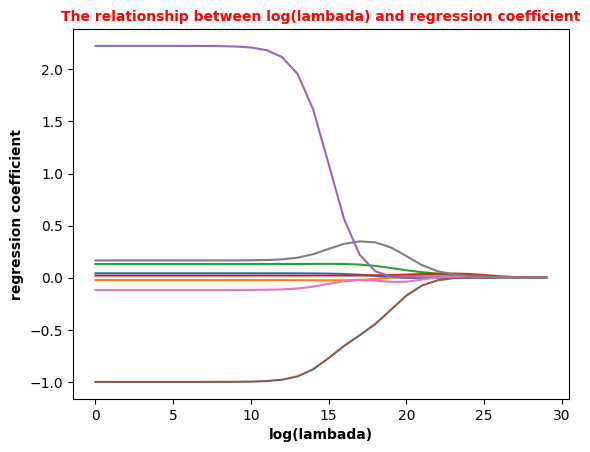

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def loadData(fileName):
    """加载数据:解析以tab键分隔的文件中的浮点数

    Args:
        fileName : 数据集文件

    Returns:
        dataMat :   feature 对应的数据集
        labelMat :  feature 对应的分类标签，即类别标签
    """
    # 获取样本特征的总数，不算最后的目标变量
    numFeat = len(open(fileName).readline().split('\t')) - 1
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        # 读取每一行
        lineArr = []
        # 删除一行中以tab分隔的数据前后的空白符号
        curLine = line.strip().split('\t')
        # i 从0到2，不包括2
        for i in range(numFeat):
            # 将数据添加到lineArr List中，每一行数据测试数据组成一个行向量
            lineArr.append(float(curLine[i]))
            # 将测试数据的输入数据部分存储到dataMat 的List中
        dataMat.append(lineArr)
        # 将每一行的最后一个数据，即类别，或者叫目标变量存储到labelMat List中
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

# 岭回归
def ridgeRegres(xMat, yMat, lam = 0.2):
    """
    Parameters:
        xMat - x数据集
        yMat - y数据集
        lam - 缩减系数
    Returns:
        ws - 回归系数
    """
    xTx = xMat.T * xMat
    denom = xTx + np.eye(np.shape(xMat)[1]) * lam
    if np.linalg.det(denom) == 0.0:
        print("矩阵为奇异矩阵,不能转置")
        return
    ws = denom.I * (xMat.T * yMat)
    return ws

def ridgeTest(xArr, yArr):
    """岭回归测试
    Args:
        xMat - x数据集
        yMat - y数据集
    Returns:
        wMat - 回归系数矩阵
    """
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    #数据标准化
    yMean = np.mean(yMat, axis = 0)                  #行与行操作，求均值
    yMat = yMat - yMean                              #数据减去均值
    xMeans = np.mean(xMat, axis = 0)                 #行与行操作，求均值
    xVar = np.var(xMat, axis = 0)                    #行与行操作，求方差
    xMat = (xMat - xMeans) / xVar                    #数据减去均值除以方差实现标准化
    numTestPts = 30                                  #30个不同的lambda测试
    wMat = np.zeros((numTestPts, np.shape(xMat)[1])) #初始回归系数矩阵
    for i in range(numTestPts):                      #改变lambda计算回归系数
        ws = ridgeRegres(xMat, yMat, np.exp(i - 10)) #lambda以e的指数变化，最初是一个非常小的数，
        wMat[i, :] = ws.T                            #计算回归系数矩阵
    return wMat

def plotwMat():
    abX, abY = loadData('data/abalone.txt')
    redgeWeights = ridgeTest(abX, abY)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(redgeWeights)
    ax_title_text = ax.set_title('The relationship between log(lambada) and regression coefficient')
    ax_xlabel_text = ax.set_xlabel('log(lambada)')
    ax_ylabel_text = ax.set_ylabel('regression coefficient')
    plt.setp(ax_title_text, size = 10, weight = 'bold', color = 'red')
    plt.setp(ax_xlabel_text, size = 10, weight = 'bold', color = 'black')
    plt.setp(ax_ylabel_text, size = 10, weight = 'bold', color = 'black')
    plt.show()


if __name__ == '__main__':
    plotwMat()

上图绘制出了回归系数与 log(λ) 的关系。在最左边，即 λ 最小时，可以得到所有系数的原始值（与线性回归一致）；而在右边，系数全部缩减为0；在中间部分的某值将可以取得最好的预测效果。为了定量地找到最佳参数值，还需要进行交叉验证。另外，要判断哪些变量对结果预测最具有影响力，在上图中观察它们对应的系数大小就可以了。

### 2、Lasso回归（L1正则化）

在增加如下约束时，普通的最小二乘法回归会得到与岭回归一样的公式:
$$
\sum_{k=1}^n w_k^2\le \lambda
$$

上式限定了所有回归系数的平方和不能大于 λ 。使用普通的最小二乘法回归在当两个或更多的特征相关时，可能会得到一个很大的正系数和一个很大的负系数。正是因为上述限制条件的存在，使用岭回归可以避免这个问题。

与岭回归类似，另一个缩减方法lasso也对回归系数做了限定，对应的约束条件如下:

$$
\sum_{k=1}^n |w_k|\le \lambda
$$

唯一的不同点在于，这个约束条件使用绝对值取代了平方和。虽然约束形式只是稍作变化，结果却大相径庭: 在 λ 足够小的时候，一些系数会因此被迫缩减到 0.这个特性可以帮助我们更好地理解数据。

### 3、前向逐步回归

前向逐步回归算法可以得到与Llasso 差不多的效果，但更加简单。它属于一种贪心算法，即每一步都尽可能减少误差。一开始，所有权重都设置为 0，然后每一步所做的决策是对某个权重增加或减少一个很小的值

伪代码如下：

```python
数据标准化，使其分布满足 0 均值 和单位方差
在每轮迭代过程中: 
    设置当前最小误差 lowestError 为正无穷
    对每个特征:
        增大或缩小:
            改变一个系数得到一个新的 w
            计算新 w 下的误差
            如果误差 Error 小于当前最小误差 lowestError: 设置 Wbest 等于当前的 W
        将 W 设置为新的 Wbest
```


原始代码如下：

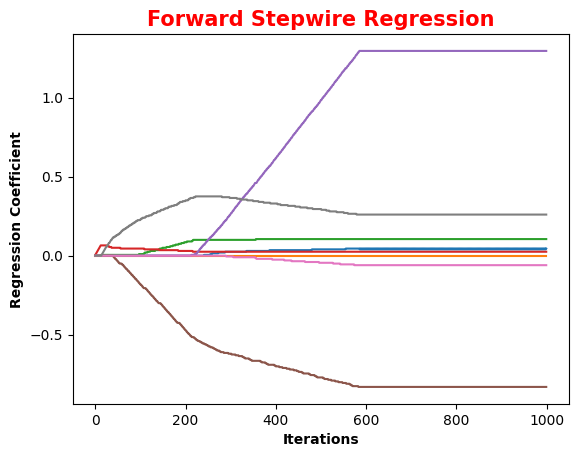

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def loadData(fileName):
    """加载数据:解析以tab键分隔的文件中的浮点数

    Args:
        fileName : 数据集文件

    Returns:
        dataMat :   feature 对应的数据集
        labelMat :  feature 对应的分类标签，即类别标签
    """
    # 获取样本特征的总数，不算最后的目标变量
    numFeat = len(open(fileName).readline().split('\t')) - 1
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        # 读取每一行
        lineArr = []
        # 删除一行中以tab分隔的数据前后的空白符号
        curLine = line.strip().split('\t')
        # i 从0到2，不包括2
        for i in range(numFeat):
            # 将数据添加到lineArr List中，每一行数据测试数据组成一个行向量
            lineArr.append(float(curLine[i]))
            # 将测试数据的输入数据部分存储到dataMat 的List中
        dataMat.append(lineArr)
        # 将每一行的最后一个数据，即类别，或者叫目标变量存储到labelMat List中
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

def rssError(yArr, yHatArr):
    '''计算分析预测误差的大小
        Args:
            yArr: 真实的目标变量
            yHatArr: 预测得到的估计值
        Returns:
            计算真实值和估计值得到的值的平方和作为最后的返回值
    '''
    return ((yArr - yHatArr)**2).sum()


def stageWise(xArr, yArr, eps=0.01, numIt=100):
    """前向逐步线性回归
    Args:
        xArr - x输入数据
        yArr - y预测数据
        eps - 每次迭代需要调整的步长
        numIt - 迭代次数
    Returns:
        returnMat - numIt次迭代的回归系数矩阵
    """
    xMat = np.mat(xArr);
    yMat = np.mat(yArr).T  # 数据集
   #数据标准化
    yMean = np.mean(yMat, axis = 0)                  #行与行操作，求均值
    yMat = yMat - yMean                              #数据减去均值
    xMeans = np.mean(xMat, axis = 0)                 #行与行操作，求均值
    xVar = np.var(xMat, axis = 0)                    #行与行操作，求方差
    xMat = (xMat - xMeans) / xVar                    #数据减去均值除以方差实现标准化
    m, n = np.shape(xMat)
    returnMat = np.zeros((numIt, n))  # 初始化numIt次迭代的回归系数矩阵
    ws = np.zeros((n, 1))  # 初始化回归系数矩阵
    wsTest = ws.copy()
    wsMax = ws.copy()
    for i in range(numIt):  # 迭代numIt次
        # print(ws.T)                             #打印当前回归系数矩阵
        lowestError = float('inf');  # 正无穷
        for j in range(n):  # 遍历每个特征的回归系数
            for sign in [-1, 1]:
                wsTest = ws.copy()
                wsTest[j] += eps * sign  # 微调回归系数
                yTest = xMat * wsTest  # 计算预测值
                rssE = rssError(yMat.A, yTest.A)  # 计算平方误差
                if rssE < lowestError:  # 如果误差更小，则更新当前的最佳回归系数
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i, :] = ws.T  # 记录numIt次迭代的回归系数矩阵
    return returnMat


def plotstageWiseMat():
    xArr, yArr = loadData('data/abalone.txt')
    returnMat = stageWise(xArr, yArr, 0.005, 1000)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(returnMat)
    ax_title_text = ax.set_title('Forward Stepwire Regression')
    ax_xlabel_text = ax.set_xlabel('Iterations')
    ax_ylabel_text = ax.set_ylabel('Regression Coefficient')
    plt.setp(ax_title_text, size=15, weight='bold', color='red')
    plt.setp(ax_xlabel_text, size=10, weight='bold', color='black')
    plt.setp(ax_ylabel_text, size=10, weight='bold', color='black')
    plt.show()


if __name__ == '__main__':
    plotstageWiseMat()


逐步线性回归算法的主要优点在于它可以帮助人们理解现有的模型并作出改进。当构建了一个模型后，可以运行该算法找出重要的特征，这样就有可能及时停止对那些不重要特征的收集。最后，如果用于测试，该算法每100次迭代后就可以构建出一个模型，可以使用类似于10折交叉验证的方法比较这些模型，最终选择使误差最小的模型。

当应用缩减方法（如逐步线性回归或岭回归）时，模型也就增加了偏差（bias），与此同时却减小了模型的方差。

## 五、权衡偏差与方差


任何时候，一旦发现模型和测量值之间存在差异，就说出现了误差。当考虑模型中的 “噪声” 或者说误差时，必须考虑其来源。你可能会对复杂的过程进行简化，这将导致在模型和测量值之间出现 “噪声” 或误差，若无法理解数据的真实生成过程，也会导致差异的产生。另外，测量过程本身也可能产生 “噪声” 或者问题。下面我们举一个例子，我们使用 `线性回归` 和 `局部加权线性回归` 处理过一个从文件导入的二维数据。

$$
y = 3.0+1.7x+0.1\sin(30x)+0.06N(0,1)
$$


其中的 N(0, 1) 是一个均值为 0、方差为 1 的正态分布。我们尝试过仅用一条直线来拟合上述数据。不难想到，直线所能得到的最佳拟合应该是 3.0+1.7x 这一部分。这样的话，误差部分就是 0.1sin(30x)+0.06N(0, 1) 。在上面，我们使用了局部加权线性回归来试图捕捉数据背后的结构。该结构拟合起来有一定的难度，因此我们测试了多组不同的局部权重来找到具有最小测试误差的解。

下图给出了训练误差和测试误差的曲线图，上面的曲面就是测试误差，下面的曲线是训练误差。我们根据 预测鲍鱼年龄 的实验知道: 如果降低核的大小，那么训练误差将变小。从下图开看，从左到右就表示了核逐渐减小的过程。

![偏差方差图](https://ailearning.apachecn.org/docs/ml/img/LinearR_17.png)

一般认为，上述两种误差由三个部分组成: 偏差、测量误差和随机噪声。局部加权线性回归 和 预测鲍鱼年龄 中，我们通过引入了三个越来越小的核来不断增大模型的方差。

在缩减系数来“理解”数据这一节中，我们介绍了缩减法，可以将一些系数缩减成很小的值或直接缩减为 0 ，这是一个增大模型偏差的例子。通过把一些特征的回归系数缩减到 0 ，同时也就减小了模型的复杂度。例子中有 8 个特征，消除其中两个后不仅使模型更易理解，同时还降低了预测误差。对照上图，左侧是参数缩减过于严厉的结果，而右侧是无缩减的效果。

方差是可以度量的。如果从鲍鱼数据中取一个随机样本集（例如取其中 100 个数据）并用线性模型拟合，将会得到一组回归系数。同理，再取出另一组随机样本集并拟合，将会得到另一组回归系数。这些系数间的差异大小也就是模型方差的反映。

## 六、回归项目案例：预测乐高玩具的价格

### 项目概述

Dangler 喜欢为乐高套装估价，我们用回归技术来帮助他建立一个预测模型。

### 开发流程

(1) 收集数据

(2) 准备数据: 从html中抽取价格。

(3) 分析数据: 可视化并观察数据。

(4) 训练算法: 构建不同的模型，采用逐步线性回归和直接的线性回归模型。

(5) 测试算法: 使用交叉验证来测试不同的模型，分析哪个效果最好。

(6) 使用算法: 这次练习的目标就是生成数据模型。

### 收集数据

收集到的数据存储在`data/setHtml`文件夹下。

### 准备数据

分析HTML页面，获取数据

In [9]:
import numpy as np
from bs4 import BeautifulSoup
import random


def scrapePage(retX, retY, inFile, yr, numPce, origPrc):
    """从页面读取数据，生成retX和retY列表
    Args:
        retX - 数据X
        retY - 数据Y
        inFile - HTML文件
        yr - 年份
        numPce - 乐高部件数目
        origPrc - 原价
    Returns:
        无
    """
    # 打开并读取HTML文件
    with open(inFile, encoding='utf-8') as f:
        html = f.read()
    soup = BeautifulSoup(html)
    i = 1
    # 根据HTML页面结构进行解析
    currentRow = soup.find_all('table', r="%d" % i)
    while (len(currentRow) != 0):
        currentRow = soup.find_all('table', r="%d" % i)
        title = currentRow[0].find_all('a')[1].text
        lwrTitle = title.lower()
        # 查找是否有全新标签
        if (lwrTitle.find('new') > -1) or (lwrTitle.find('nisb') > -1):
            newFlag = 1.0
        else:
            newFlag = 0.0
        # 查找是否已经标志出售，我们只收集已出售的数据
        soldUnicde = currentRow[0].find_all('td')[3].find_all('span')
        if len(soldUnicde) == 0:
            print("商品 #%d 没有出售" % i)
        else:
            # 解析页面获取当前价格
            soldPrice = currentRow[0].find_all('td')[4]
            priceStr = soldPrice.text
            priceStr = priceStr.replace('$', '')
            priceStr = priceStr.replace(',', '')
            if len(soldPrice) > 1:
                priceStr = priceStr.replace('Free shipping', '')
            sellingPrice = float(priceStr)
            # 去掉不完整的套装价格
            if sellingPrice > origPrc * 0.5:
                print("%d\t%d\t%d\t%f\t%f" %
                      (yr, numPce, newFlag, origPrc, sellingPrice))
                retX.append([yr, numPce, newFlag, origPrc])
                retY.append(sellingPrice)
        i += 1
        currentRow = soup.find_all('table', r="%d" % i)


# 依次读取六种乐高套装的数据，并生成数据矩阵
def setDataCollect(retX, retY):
    # 2006年的乐高8288,部件数目800,原价49.99
    scrapePage(retX, retY, 'data/setHtml/lego8288.html', 2006, 800, 49.99)
    # 2002年的乐高10030,部件数目3096,原价269.99
    scrapePage(retX, retY, 'data/setHtml/lego10030.html', 2002, 3096, 269.99)
    # 2007年的乐高10179,部件数目5195,原价499.99
    scrapePage(retX, retY, 'data/setHtml/lego10179.html', 2007, 5195, 499.99)
    # 2007年的乐高10181,部件数目3428,原价199.99
    scrapePage(retX, retY, 'data/setHtml/lego10181.html', 2007, 3428, 199.99)
    # 2008年的乐高10189,部件数目5922,原价299.99
    scrapePage(retX, retY, 'data/setHtml/lego10189.html', 2008, 5922, 299.99)
    # 2009年的乐高10196,部件数目3263,原价249.99
    scrapePage(retX, retY, 'data/setHtml/lego10196.html', 2009, 3263, 249.99)

### 分析数据

打印出数据，然后进行观察

这些特征分别为：出品年份、部件数目、是否为全新、原价、售价（二手交易）。

In [10]:
dataX = []
dataY = []
setDataCollect(dataX, dataY)
print(dataX)
print(dataY)

2006	800	0	49.990000	85.000000
2006	800	0	49.990000	102.500000
2006	800	0	49.990000	77.000000
商品 #4 没有出售
2006	800	0	49.990000	162.500000
2002	3096	0	269.990000	699.990000
2002	3096	0	269.990000	602.000000
2002	3096	0	269.990000	515.000000
2002	3096	0	269.990000	510.000000
2002	3096	0	269.990000	375.000000
2002	3096	1	269.990000	1050.000000
2002	3096	0	269.990000	740.000000
2002	3096	1	269.990000	759.000000
2002	3096	0	269.990000	730.000000
2002	3096	1	269.990000	750.000000
商品 #11 没有出售
2007	5195	0	499.990000	910.000000
2007	5195	1	499.990000	1199.990000
2007	5195	0	499.990000	811.880000
商品 #4 没有出售
2007	5195	0	499.990000	1324.790000
2007	5195	1	499.990000	850.000000
2007	5195	1	499.990000	800.000000
2007	5195	0	499.990000	810.000000
2007	5195	1	499.990000	1075.000000
2007	5195	0	499.990000	1050.000000
2007	5195	1	499.990000	1199.990000
2007	5195	0	499.990000	1342.310000
2007	5195	1	499.990000	1000.000000
2007	5195	0	499.990000	1780.000000
2007	5195	0	499.990000	750.000000
商品 #16 没有出售
200

### 训练算法

#### 使用简单的线性回归

In [15]:
def useStandRegres(dataX, dataY):
    """使用简单线性回归
    Args:
        dataX (_type_): _description_
        dataY (_type_): _description_
    """    
    data_num, features_num = shape(dataX)
    dataX1 = mat(ones((data_num, features_num + 1)))
    dataX1[:, 1:5] = mat(dataX)
    ws = regression(dataX1, dataY)
    print("使用简单线性回归")
    print('%f%+f*年份%+f*部件数量%+f*是否为全新%+f*原价' % (ws[0], ws[1], ws[2], ws[3], ws[4]))

useStandRegres(dataX, dataY)

使用简单线性回归
55319.970081-27.592822*年份-0.026839*部件数量-11.220848*是否为全新+2.576041*原价


#### 使用岭回归进行特征选择

In [19]:
def crossValidation(xArr, yArr, numVal=10):
    """交叉验证岭回归
    Parameters:
        xArr - x数据集
        yArr - y数据集
        numVal - 交叉验证次数
    Returns:
        wMat - 回归系数矩阵
    """
    m = len(yArr)  # 统计样本个数
    indexList = list(range(m))  # 生成索引值列表
    errorMat = zeros((numVal, 30))  # create error mat 30columns numVal rows
    for i in range(numVal):  # 交叉验证numVal次
        trainX = [];
        trainY = []  # 训练集
        testX = [];
        testY = []  # 测试集
        random.shuffle(indexList)  # 打乱次序
        for j in range(m):  # 划分数据集:90%训练集，10%测试集
            if j < m * 0.9:
                trainX.append(xArr[indexList[j]])
                trainY.append(yArr[indexList[j]])
            else:
                testX.append(xArr[indexList[j]])
                testY.append(yArr[indexList[j]])
        wMat = ridgeTest(trainX, trainY)  # 获得30个不同lambda下的岭回归系数
        for k in range(30):  # 遍历所有的岭回归系数
            matTestX = mat(testX);
            matTrainX = mat(trainX)  # 测试集
            meanTrain = mean(matTrainX, 0)  # 测试集均值
            varTrain = var(matTrainX, 0)  # 测试集方差
            matTestX = (matTestX - meanTrain) / varTrain  # 测试集标准化
            yEst = matTestX * mat(wMat[k, :]).T + mean(trainY)  # 根据ws预测y值
            errorMat[i, k] = rssError(yEst.T.A, array(testY))  # 统计误差
    meanErrors = mean(errorMat, 0)  # 计算每次交叉验证的平均误差
    minMean = float(min(meanErrors))  # 找到最小误差
    bestWeights = wMat[nonzero(meanErrors == minMean)]  # 找到最佳回归系数
    print("未还原的最佳回归系数")
    print(bestWeights)
    xMat = mat(xArr);
    yMat = mat(yArr).T
    meanX = mean(xMat, 0);
    varX = var(xMat, 0)
    unReg = bestWeights / varX  # 数据经过标准化，因此需要还原
    print("使用岭回归")
    print('%f%+f*年份%+f*部件数量%+f*是否为全新%+f*原价' % (
    (-1 * sum(multiply(meanX, unReg)) + mean(yMat)), unReg[0, 0], unReg[0, 1], unReg[0, 2], unReg[0, 3]))


crossValidation(dataX, dataY, 10)

未还原的最佳回归系数
[[-1.60290573e+02 -9.07918034e+03 -7.02146036e+00  4.70967195e+04]]
使用岭回归
69494.520428-34.692621*年份-0.004583*部件数量-28.092920*是否为全新+2.533502*原价


回归系数是经过不同程度的缩减得到的。未还原的最佳回归系数，第4项比第2项的系数大5倍，比第1项大300多倍。这样看来，如果只能选择一个特征来做预测的话，我们应该选择第4个特征，也就是原始价格。如果可以选择2个特征的话，应该选择第4个和第2个特征，即年份和原价。

这种分析方法使得我们可以挖掘大量数据的内在规律。在仅有4个特征时，该方法的效果也许并不明显；但如果有100个以上的特征，该方法就会变得十分有效：它可以指出哪个特征是关键的，而哪些特征是不重要的。